In [2]:
import numpy as np
from tqdm.auto import tqdm

import torch
import pytorch_lightning as pl

from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import RichProgressBar
from pytorch_lightning.callbacks.progress.rich_progress import RichProgressBarTheme

from torch import nn
from torch import optim
from torch.utils.data import DataLoader, Subset

from deeptime.data.datamodules import UcrDataModule
from deeptime.models.representation import LinearVariationalAutoEncoder

In [8]:
train_dataset = UCRDataset(name='FordA', split='train')
len(train_dataset)

3601

In [9]:
test_dataset = UCRDataset(name='FordA', split='test')
len(test_dataset)

1320

In [10]:
unique_labels = torch.unique(train_dataset[:][1])
unique_labels

tensor([-1.,  1.])

In [11]:
for label in unique_labels:
    x_train, y_train = train_dataset[label == train_dataset[:][1]]

    filtered_dataset = BaseDataset(
        x=np.array(x_train.tolist()),
        y=np.array(y_train.tolist())
    )

    train_loader = DataLoader(filtered_dataset, batch_size=16)

    autoencoder = LinearVariationalAutoEncoder(input_dim=x_train.shape[-1], hidden_dim=128, latent_dim=32)
    trainer = pl.Trainer(max_epochs=1000, accelerator='gpu', devices=-1)

    trainer.fit(model=autoencoder, train_dataloaders=train_loader)
    break

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params
------------------------------------
0 | e    | Sequential | 404 K 
1 | d    | Sequential | 396 K 
------------------------------------
800 K     Trainable params
0         Non-trainable params
800 K     Total params
3.203     Total estimated model params size (MB)
C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasi

Epoch 0:   9%|████                                           | 10/116 [00:00<00:01, 65.78it/s, loss=8.02e+03, v_num=20]

C:\Users\medei\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch 999: 100%|█████████████████████████████████████████████████| 116/116 [00:02<00:00, 49.96it/s, loss=466, v_num=20]

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 999: 100%|█████████████████████████████████████████████████| 116/116 [00:02<00:00, 48.80it/s, loss=466, v_num=20]


In [7]:
import matplotlib.pyplot as plt

linear_variational_autoencoder = LinearVariationalAutoEncoder(input_dim=426, hidden_dim=128, latent_dim=32)
linear_variational_autoencoder.load_state_dict(torch.load('../../../pretrain/representation/Yoga/linear_variational_autoencoder.pt'))

<All keys matched successfully>

In [10]:
data_module = UcrDataModule(dataset_name='Yoga', data_dir='./')

data_module.prepare_data()
data_module.setup(stage='fit')

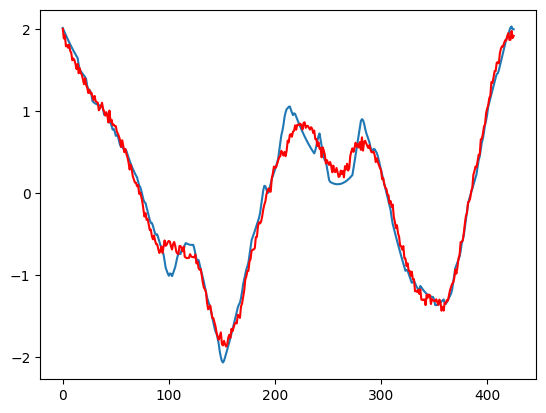

In [11]:
sample = data_module.train_dataset[:1][0]
sample_list = sample.reshape((1, 426)).tolist()

sample_pred = linear_variational_autoencoder(sample)

plt.plot(list(range(426)), sample_list[0])
plt.plot(list(range(426)), sample_pred[0].reshape((1, 426)).tolist()[0], color='red')